# Veri seti hazırlığı

In [ ]:
import pandas as pd

fake_news_dataset = pd.read_csv("datasets/Fake.csv")
real_news_dataset = pd.read_csv("datasets/True.csv")

In [ ]:
real_news_dataset.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
fake_news_dataset.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
real_news_dataset['type'] = '1'

In [ ]:
fake_news_dataset['type'] = '0'

In [ ]:
birlesik_dataset = pd.concat([fake_news_dataset, real_news_dataset], ignore_index=True)
birlesik_dataset.head(5)

,title,text,subject,date,type
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


# Veri seti karıştırma işlemi

In [ ]:
birlesik_dataset = birlesik_dataset.sample(frac=1, random_state=42).reset_index(drop=True)
birlesik_dataset.head(5)

,title,text,subject,date,type
0,It’s Really Happening: Trump Adviser Lays Out...,"Well, that didn t take long. In the short time...",News,"November 16, 2016",0
1,Republican attempt to deflect Trump-Russia pro...,(Reuters) - Republican lawmaker Devin Nunes’ i...,politicsNews,"September 11, 2017",1
2,Trump says churches should get FEMA funds for ...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"September 9, 2017",1
3,Trump Loves To Say The New York Times Is ‘Fai...,Print journalism and longstanding papers have ...,News,"August 7, 2017",0
4,House Speaker Ryan briefed Trump on healthcare...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"March 24, 2017",1


# Özellik dağılım tabloları

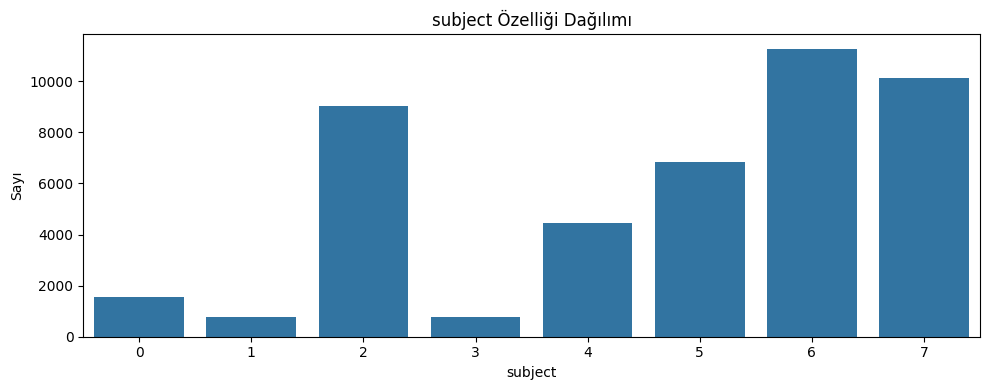

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# subject	 özelliği dağılımı

plt.figure(figsize=(10, 4))
sns.countplot(x='subject', data=birlesik_dataset)
plt.title('subject Özelliği Dağılımı')
plt.xlabel('subject')
plt.ylabel('Sayı')
plt.tight_layout()
plt.show()

# Feature Engineering

In [ ]:
# --- Feature Engineering Başlangıcı ---

# 1. Metin Uzunluğu Özellikleri
# 'text' sütunu için metin uzunluğu
birlesik_dataset['text_uzunlugu'] = birlesik_dataset['text'].astype(str).apply(len)

# 'title' sütunu için metin uzunluğu
birlesik_dataset['title_uzunlugu'] = birlesik_dataset['title'].astype(str).apply(len)



In [ ]:
import string
# 2. Noktalama İşareti Sayısı Özellikleri
# Kullanılacak noktalama işaretleri seti
noktalama_isaretleri = string.punctuation
print(f"Kullanılacak Noktalama İşaretleri: {noktalama_isaretleri}")

# 'text' sütunundaki noktalama işareti sayısı
birlesik_dataset['text_noktalama_sayisi'] = birlesik_dataset['text'].astype(str).apply(lambda x: sum(karakter in noktalama_isaretleri for karakter in x))

# 'title' sütunundaki noktalama işareti sayısı
birlesik_dataset['title_noktalama_sayisi'] = birlesik_dataset['title'].astype(str).apply(lambda x: sum(karakter in noktalama_isaretleri for karakter in x))


Kullanılacak Noktalama İşaretleri: !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
# 3. Kelime Sayısı
birlesik_dataset['text_kelime_sayisi'] = birlesik_dataset['text'].astype(str).apply(lambda x: len(x.split()))
birlesik_dataset['title_kelime_sayisi'] = birlesik_dataset['title'].astype(str).apply(lambda x: len(x.split()))


In [ ]:
# 4. Ortalama Kelime Uzunluğu (Basit Yaklaşım: noktalama işaretlerini temizleyerek)
def ort_kelime_uzunlugu(text):
    text = text.translate(str.maketrans('', '', string.punctuation)) # Noktalamaları kaldır
    kelimeler = text.split()
    if not kelimeler:
        return 0
    return sum(len(kelime) for kelime in kelimeler) / len(kelimeler)

birlesik_dataset['text_ort_kelime_uzunlugu'] = birlesik_dataset['text'].astype(str).apply(ort_kelime_uzunlugu)
birlesik_dataset['title_ort_kelime_uzunlugu'] = birlesik_dataset['title'].astype(str).apply(ort_kelime_uzunlugu)

In [ ]:
import re
# 5. Cümle Sayısı (Basit Yaklaşım: '.', '!', '?' sayarak)
birlesik_dataset['text_cumle_sayisi'] = birlesik_dataset['text'].astype(str).apply(lambda x: len(re.findall(r'[.!?]+', x)) if len(re.findall(r'[.!?]+', x)) > 0 else 1) # Hiç yoksa 1 cümle varsay

In [ ]:
# 6. Ortalama Cümle Uzunluğu
birlesik_dataset['text_ort_cumle_uzunlugu'] = birlesik_dataset['text_kelime_sayisi'] / birlesik_dataset['text_cumle_sayisi']

In [ ]:
# 7. Büyük Harf Kelime Sayısı
birlesik_dataset['text_buyuk_harf_kelime_sayisi'] = birlesik_dataset['text'].astype(str).apply(lambda x: len([kelime for kelime in x.split() if kelime.isupper() and len(kelime) > 1])) # Sadece birden fazla harfli tamamen büyük kelimeler

In [ ]:
# 8. Rakam Sayısı
birlesik_dataset['text_rakam_sayisi'] = birlesik_dataset['text'].astype(str).apply(lambda x: sum(c.isdigit() for c in x))

In [ ]:
birlesik_dataset = pd.DataFrame(birlesik_dataset)
birlesik_dataset.head(2)

,title,text,subject,date,type,text_uzunlugu,title_uzunlugu,text_noktalama_sayisi,title_noktalama_sayisi,text_ort_kelime_uzunlugu,title_ort_kelime_uzunlugu,text_cumle_sayisi,text_kelime_sayisi,title_kelime_sayisi,text_ort_cumle_uzunlugu,text_buyuk_harf_kelime_sayisi,text_rakam_sayisi
0,It’s Really Happening: Trump Adviser Lays Out...,"Well, that didn t take long. In the short time...",News,"November 16, 2016",0,3238,80,54,1,5.088292,5.583333,20,521,12,26.050000,0,0
1,Republican attempt to deflect Trump-Russia pro...,(Reuters) - Republican lawmaker Devin Nunes’ i...,politicsNews,"September 11, 2017",1,3692,73,74,2,5.590494,7.000000,39,549,9,14.076923,6,12


# Kategoriksel veriyi sayısal veriye dönüştürme

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Karakteristik verilerimizi sayısallaştırma işlemi

le=LabelEncoder()
birlesik_dataset['subject']=le.fit_transform(birlesik_dataset['subject'])

In [ ]:
birlesik_dataset.head(2)

,title,text,subject,date,type,text_uzunlugu,title_uzunlugu,text_noktalama_sayisi,title_noktalama_sayisi,text_ort_kelime_uzunlugu,title_ort_kelime_uzunlugu,text_cumle_sayisi,text_kelime_sayisi,title_kelime_sayisi,text_ort_cumle_uzunlugu,text_buyuk_harf_kelime_sayisi,text_rakam_sayisi
0,It’s Really Happening: Trump Adviser Lays Out...,"Well, that didn t take long. In the short time...",2,"November 16, 2016",0,3238,80,54,1,5.088292,5.583333,20,521,12,26.050000,0,0
1,Republican attempt to deflect Trump-Russia pro...,(Reuters) - Republican lawmaker Devin Nunes’ i...,6,"September 11, 2017",1,3692,73,74,2,5.590494,7.000000,39,549,9,14.076923,6,12


# Eğitime hazırlık

In [ ]:
X = birlesik_dataset.drop(['title', 'text', 'date', 'type'], axis=1)
y = birlesik_dataset['type']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN ile eğitim

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

## Feature Importance grafiği

In [ ]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

result = permutation_importance(knn, X_test, y_test, n_repeats=10, random_state=42)
for i in result.importances_mean.argsort()[::-1]:
    print(f"{i}: {result.importances_mean[i]:.3f} ± {result.importances_std[i]:.3f}")

1: 0.301 ± 0.004
8: 0.270 ± 0.004
2: 0.224 ± 0.002
3: 0.068 ± 0.002
12: 0.023 ± 0.002
11: 0.015 ± 0.001
0: 0.012 ± 0.001
7: 0.004 ± 0.001
10: 0.003 ± 0.001
5: 0.000 ± 0.000
9: 0.000 ± 0.001
6: 0.000 ± 0.000
4: -0.001 ± 0.000


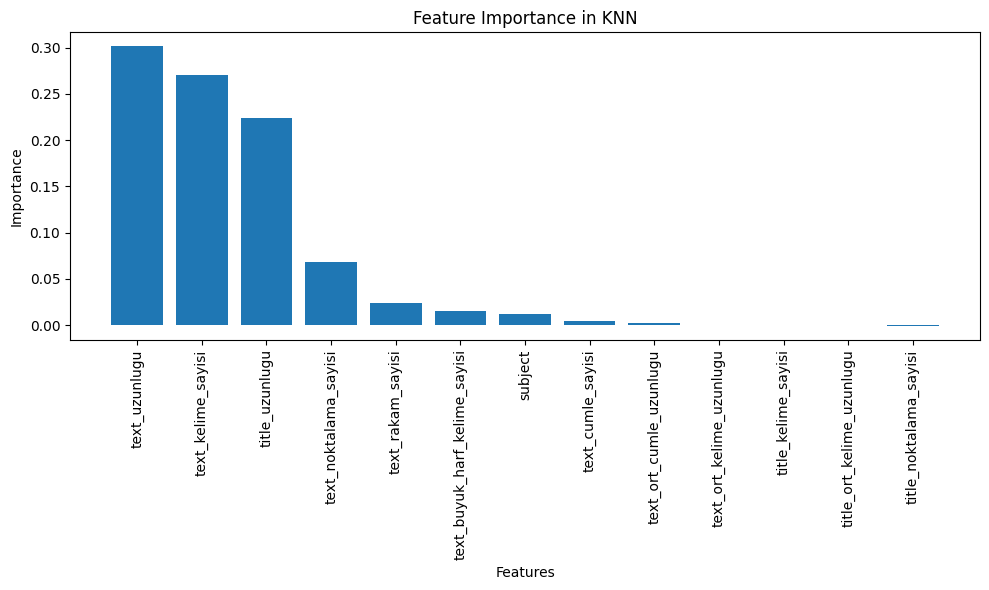

In [ ]:
import numpy as np

feature_names = X.columns
sorted_indices = np.argsort(result.importances_mean)[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(len(result.importances_mean)), result.importances_mean[sorted_indices], align='center')
plt.xticks(range(len(result.importances_mean)), feature_names[sorted_indices], rotation=90)
plt.title('Feature Importance in KNN')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()

## Importance çıktısına göre KNN ile eğitime hazırlık güncellemesi

In [ ]:
X_KNN = birlesik_dataset.drop(['title', 'text', 'date', 'type', 'text_ort_kelime_uzunlugu', 'title_kelime_sayisi', 'title_ort_kelime_uzunlugu'], axis=1)
y_KNN = birlesik_dataset['type']

In [ ]:
X_train_KNN, X_test_KNN, y_train_KNN, y_test_KNN = train_test_split(X_KNN, y_KNN, test_size=0.2, random_state=42)

## KNN ile GridSearchCV kullanarak hiperparametre optimizasyonu

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# KNN modelini oluştur
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': list(range(3, 15)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_KNN, y_train_KNN)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
# Sonuçlar
print("En iyi parametreler:", grid_search.best_params_)
print("En iyi doğruluk (cv):", grid_search.best_score_)

En iyi parametreler: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}
En iyi doğruluk (cv): 0.9249677342289562


## En iyi hiperparametreleri kullanarak model eğitimi

In [ ]:
knn = KNeighborsClassifier(metric='manhattan', n_neighbors=10, weights = 'distance')
knn.fit(X_train_KNN, y_train_KNN)
y_pred_KNN = knn.predict(X_test_KNN)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
# Başarı oranını yazdır
print("Accuracy:", accuracy_score(y_test_KNN, y_pred_KNN))
print("\nClassification Report:\n", classification_report(y_test_KNN, y_pred_KNN))

Accuracy: 0.9375278396436526

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94      4619
           1       0.92      0.96      0.94      4361

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



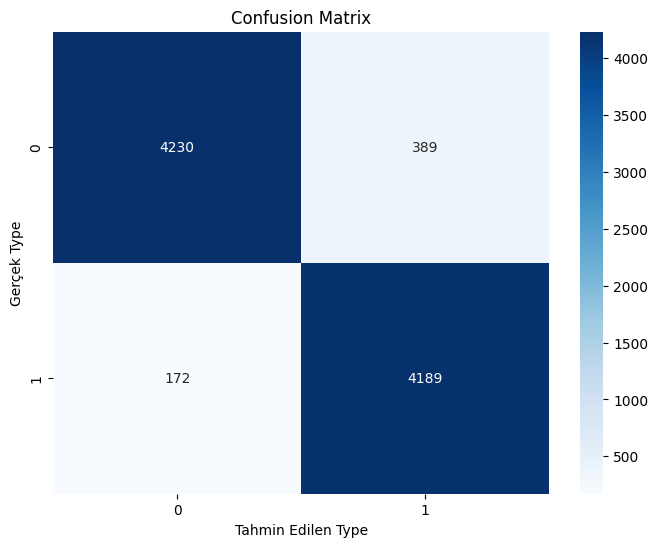

In [ ]:
# Confusion Matrix Görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_KNN, y_pred_KNN), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Tahmin Edilen Type')
plt.ylabel('Gerçek Type')
plt.show()

# Random Forest ile eğitim

In [ ]:
from sklearn.ensemble import RandomForestClassifier

## Feature Importance Grafiği

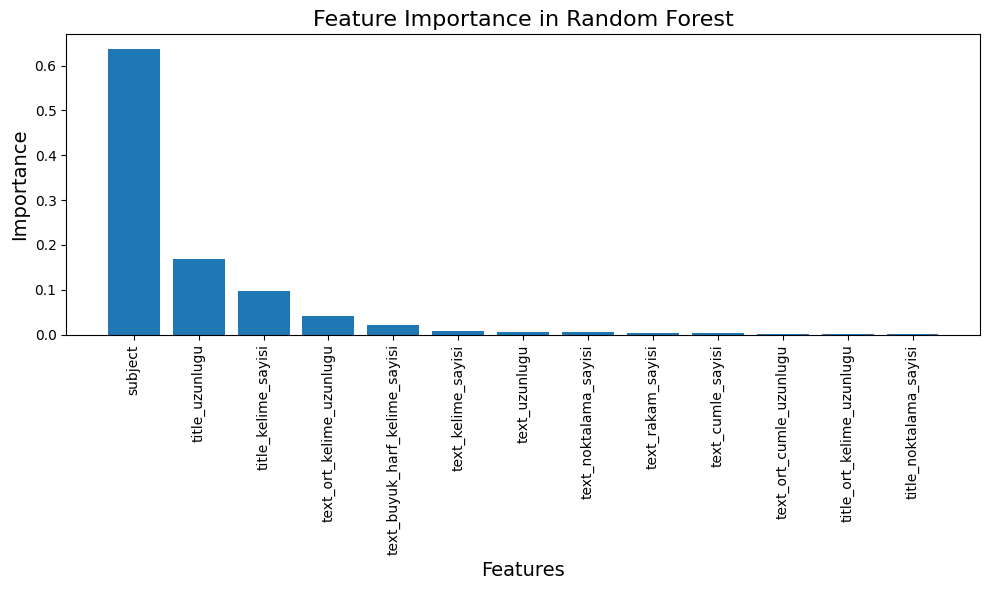

In [ ]:
modelRandomForest = RandomForestClassifier()
modelRandomForest.fit(X_train,y_train)
importance=modelRandomForest.feature_importances_

# Öneme  göre ayırma
indices = np.argsort(importance)[::-1]
feature_names = X.columns

# Create bar chart with sorted features
plt.figure(figsize=(10, 6))
plt.bar(range(len(importance)), importance[indices], align='center')
plt.xticks(range(len(importance)), feature_names[indices], rotation=90)
plt.title('Feature Importance in Random Forest', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.tight_layout()
plt.show()

## Importance çıktısına göre Random Forest ile eğitime hazırlık güncellemesi

In [ ]:
X_RF = birlesik_dataset.drop(['title', 'text', 'date', 'type', 'subject'], axis=1)
y_RF = birlesik_dataset['type']

In [ ]:
X_train_RF, X_test_RF, y_train_RF, y_test_RF = train_test_split(X_RF, y_RF, test_size=0.2, random_state=42)

## Random Forest ile RandomizedSearchCV kullanarak hiperparametre optimizasyonu

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:

param_distributions = {
    'n_estimators': [50, 100, 150, 200],
    'max_features': ['sqrt', 'log2', 0.5],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [10, 20, 40],
    'min_samples_leaf': [5, 10, 15],
    'bootstrap': [True, False]
}

rf_estimator = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf_estimator,
    param_distributions=param_distributions,
    n_iter=30,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_RF, y_train_RF)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20],
                                        'max_features': ['sqrt', 'log2', 0.5],
                                        'min_samples_leaf': [5, 10, 15],
                                        'min_samples_split': [10, 20, 40],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=42, verbose=2)

In [ ]:
print("Random forest için  ")
print("En iyi hiperparametreler :",random_search.best_params_)
print("En iyi doğruluk (cv):", random_search.best_score_)

Random forest için  
En iyi hiperparametreler : {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': True}
En iyi doğruluk (cv): 0.9134417574345763


## En iyi hiperparametreleri kullanarak model eğitimi

In [ ]:
rf=RandomForestClassifier(n_estimators = 100, min_samples_split =10, min_samples_leaf = 5, max_features = 'log2', max_depth =20, bootstrap = True)
rf.fit(X_train_RF,y_train_RF)
y_pred_RF=rf.predict(X_test_RF)

In [ ]:
print("Model Doğruluk Oranı:", accuracy_score(y_test_RF, y_pred_RF))
print("\nSınıflandırma Raporu:\n", classification_report(y_test_RF, y_pred_RF))

Model Doğruluk Oranı: 0.9199331848552339

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92      4619
           1       0.91      0.93      0.92      4361

    accuracy                           0.92      8980
   macro avg       0.92      0.92      0.92      8980
weighted avg       0.92      0.92      0.92      8980



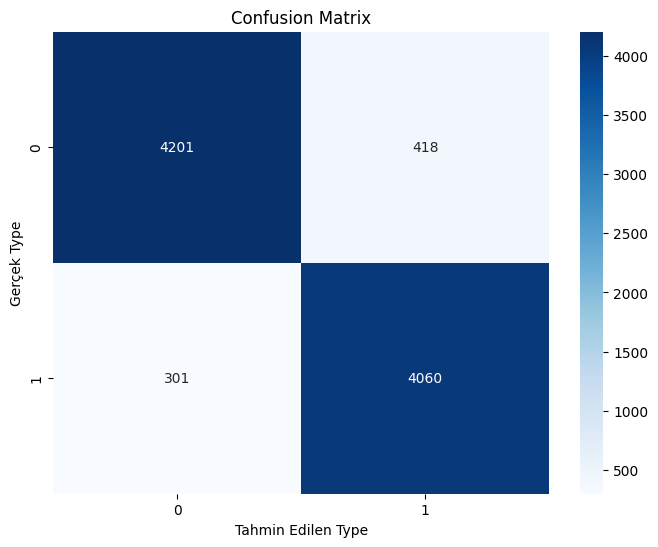

In [ ]:
# Confusion Matrix Görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_RF, y_pred_RF), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Tahmin Edilen Type')
plt.ylabel('Gerçek Type')
plt.show()